In [29]:
import numpy as np

def calc_dX_with_interpolation(dimensionless_event, percentile):

    time_percentage = (np.arange(0, len(dimensionless_event) + 1) / len(dimensionless_event)) * 100

    # Find the indices where the cumulative rainfall crosses the percentile_value
    indices_below = np.where(dimensionless_event < percentile)[0]
    indices_above = np.where(dimensionless_event >= percentile)[0]

    # Ensure there are indices both below and above the percentile value
    if len(indices_below) > 0 and len(indices_above) > 0:
        index_below = indices_below[-1]  # Last index below the percentile value
        index_above = indices_above[0]    # First index above the percentile value

        # Perform linear interpolation to find the exact intersection point
        x_below = time_percentage[index_below]
        y_below = dimensionless_event[index_below]

        x_above = time_percentage[index_above]
        y_above = dimensionless_event[index_above]

        # Calculate the slope
        slope = (y_above - y_below) / (x_above - x_below)
        # Use the formula to find the exact x value where the y value equals percentile_value
        time_for_percentile = x_below + (percentile - y_below) / slope
        
        if time_for_percentile < 0.4:
            return 1
        elif time_for_percentile >= 0.4 and time_for_percentile <=0.6:
            return 2
        elif time_for_percentile >0.6:
            return 3        



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d
import seaborn as sns

from ClassFunctions import precip_time_series, rainfall_analysis

# Path to data file
raw_data_file = "../Raw_data/Sample1.csv"

# Create an object with the rainfall time series 
ts = precip_time_series(raw_data_file)

# Pad and resample the timeseries so it is at 5 minute resolution, and there are no missing times
ts.pad_and_resample('5min')

# Create on the object a set of filtered events
ts.get_events()

# Create on the object a set of dimensionless curves
ts.create_dimensionless_events()

# Create on the object a set of dimensionless curves
ts.create_interpolated_events()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25604/25604 [00:07<00:00, 3461.68it/s]


In [30]:
## Get examples for one event
event_idx  = 1
event = ts.return_specific_event(event_idx)
dimensionless_cumulative_event =  ts.return_specific_dimensionless_event(event_idx)
interpolated_dimensionless_cumulative_event =  ts.return_specific_interpolated_event(event_idx)
calc_dX_with_interpolation(dimensionless_cumulative_event, 0.5)

3

In [23]:
dimensionless_event = dimensionless_cumulative_event
time_percentage = (np.arange(0, len(dimensionless_event) + 1) / len(dimensionless_event)) * 100

# Find the indices where the cumulative rainfall crosses the percentile_value
indices_below = np.where(dimensionless_event < percentile)[0]
indices_above = np.where(dimensionless_event >= percentile)[0]

# Ensure there are indices both below and above the percentile value
if len(indices_below) > 0 and len(indices_above) > 0:
    index_below = indices_below[-1]  # Last index below the percentile value
    index_above = indices_above[0]    # First index above the percentile value

    # Perform linear interpolation to find the exact intersection point
    x_below = time_percentage[index_below]
    y_below = dimensionless_event[index_below]

    x_above = time_percentage[index_above]
    y_above = dimensionless_event[index_above]

    # Calculate the slope
    slope = (y_above - y_below) / (x_above - x_below)
    # Use the formula to find the exact x value where the y value equals percentile_value
    time_for_percentile = x_below + (percentile - y_below) / slope
    


68.16993464052291

In [47]:
import numpy as np

# Assuming `event['Nedbør (mm)']` is a Pandas Series
rainfall = event['Nedbør (mm)'].values
time_indices = np.arange(len(rainfall))  # Time steps (0, 1, 2, ...)

# Compute Center of Mass
if np.sum(rainfall) == 0:
    com = None  # If there's no rainfall, COM is undefined
else:
    com = np.sum(time_indices * rainfall) / np.sum(rainfall)

print(f"Center of Mass (time index): {com}")


Center of Mass (time index): 173.37073170731713


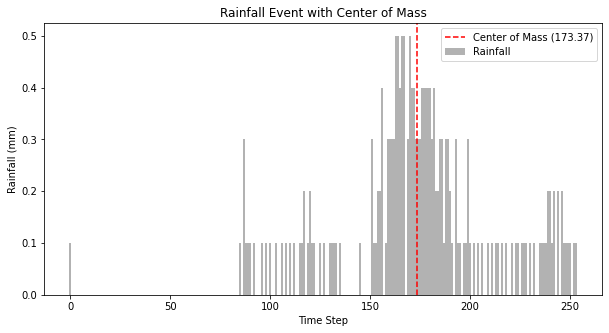

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(time_indices, rainfall, color='gray', alpha=0.6, label="Rainfall")
if com is not None:
    plt.axvline(com, color='red', linestyle="--", label=f"Center of Mass ({com:.2f})")
plt.xlabel("Time Step")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Event with Center of Mass")
plt.legend()
plt.show()


In [33]:
def compute_rcg_idx(series):

        # Culmitative sum
        culmitative_sum = np.cumsum(series)

        # Normalize
        culmitative_sum /= culmitative_sum[-1]

        #first idx over 0.5
        idx = np.argmax(culmitative_sum>0.5)

        return idx

def compute_rcg(series):

    time_delta = self.ts.data.index[1]-self.ts.data.index[0]
    time_delta_minuts = time_delta.seconds/60

    # first index over center of mass
    rcg_indeces = np.array([self.compute_rcg_idx(self.ts.data.loc[event[0]:event[1]].values) for event in self.ts.events])

    # time of center
    toc = np.array([self.ts.data.loc[event[0]:event[1]].index[rcg_indeces[i]] for i,event in enumerate(self.ts.events)])

    # duration until center
    tcg = np.array([time_delta_minuts + (toc[i] - event[0]).total_seconds()/60 for i,event in enumerate(self.ts.events)]).reshape(self.metrics["duration"].shape)

    # rcg
    rcg = tcg/self.metrics["duration"]

    return rcg




array([0.        , 0.00487805, 0.00487805, 0.00487805, 0.05853659,
       0.13170732, 0.18243902, 0.56682927, 0.8195122 , 0.88585366,
       1.        ])